
# DenseNet DL Modeling on COVID-QU-Ex Dataset
In this notebook, we explore the application of an advanced image recognition model, DenseNet201, on the COVID-QU-Ex dataset available on Kaggle (https://www.kaggle.com/datasets/anasmohammedtahir/covidqu). Our goal is to leverage DenseNet201's powerful features for enhancing COVID-19 image classification tasks.

## PART 1: Analyses on images

## Data Preparation and Analysis
- Data Loading: We'll start by defining a function to import the dataset directly from Kaggle into our working environment. This process ensures that our analysis is reproducible and streamlined.
- Image Visualization: Initial data exploration will involve displaying raw images from the dataset alongside their CLAHE (Contrast Limited Adaptive Histogram Equalization) enhanced versions. This step is crucial for understanding the potential improvements in image quality and clarity brought by CLAHE preprocessing.
## Model Setup and Training
- Model Importation and Configuration: We will import the DenseNet201 model from Keras, configuring it for our specific needs. The model will undergo fine-tuning to better adapt to the characteristics of our dataset.
- Training and Validation: The adjusted model will be trained using the training subset and its performance will be monitored on a validation set. This phase is vital for iterative model improvement and tuning.
## Model Evaluation
- Testing: After training, the model's effectiveness will be assessed using a separate test dataset. This step helps in evaluating the real-world applicability of our model.
- Grad-CAM Analysis: To gain deeper insights into the decision-making processes of our model, we will employ Gradient-weighted Class Activation Mapping (Grad-CAM). This technique visualizes the areas in the images that significantly influence the model’s predictions, offering an intuitive explanation of its behavior.



## PART 2: Analyses on masked images
By focusing on masked images, we aim to enhance the model's ability to concentrate on clinically relevant features within the images, potentially improving diagnostic accuracy and robustness. This part will critically analyze the impact of image masking on model performance, providing valuable insights into the benefits and limitations of this approach.
## Data Preparation and Analysis
- Apply Masks: Utilizing the previously defined data loading functions, we will retrieve both the original images and their corresponding masks. The masks will be applied to the original images to generate masked versions.
- Visualizing Masked Images: To ensure that our masking process is correctly performed, we will visualize a subset of the original images alongside their masks and the resulting masked images. This step not only verifies the process but also provides insight into how the model's input will be altered by masking.
Similar to our initial data preparation phase, the masked images will be normalized to ensure model training consistency.
## Model Setup and Training
- Model : Model build above will also be used here, applied to masled images datasets.
- Training and Validation: The adjusted model will be trained using the training subset and its performance will be monitored on a validation set. This phase is vital for iterative model improvement and tuning.
## Model Evaluation
- Testing: Here again, after training, the model's effectiveness will be assessed using a separate test dataset. This step helps in evaluating the real-world applicability of our model.
- Grad-CAM Analysis: To gain deeper insights into the decision-making processes of our model, we will employ Gradient-weighted Class Activation Mapping (Grad-CAM). This technique visualizes the areas in the images that significantly influence the model’s predictions, offering an intuitive explanation of its behavior.

By the end of this notebook, we aim to achieve a robust understanding of how DenseNet201 can be optimized for better performance in diagnosing COVID-19 from X-ray images, providing valuable tools for medical professionals in the fight against this pandemic.

# REFERENCES
[1] A. M. Tahir, M. E. H. Chowdhury, A. Khandakar, Y. Qiblawey, U. Khurshid, S. Kiranyaz, N. Ibtehaz, M. S. Rahman, S. Al-Madeed, S. Mahmud, M. Ezeddin, K. Hameed, and T. Hamid, “COVID-19 Infection Localization and Severity Grading from Chest X-ray Images”, Computers in Biology and Medicine, vol. 139, p. 105002, 2021, https://doi.org/10.1016/j.compbiomed.2021.105002.     \
[2] Anas M. Tahir, Muhammad E. H. Chowdhury, Yazan Qiblawey, Amith Khandakar, Tawsifur Rahman, Serkan Kiranyaz, Uzair Khurshid, Nabil Ibtehaz, Sakib Mahmud, and Maymouna Ezeddin, “COVID-QU-Ex .” Kaggle, 2021, https://doi.org/10.34740/kaggle/dsv/3122958. \
[3] T. Rahman, A. Khandakar, Y. Qiblawey A. Tahir S. Kiranyaz, S. Abul Kashem, M. Islam, S. Al Maadeed, S. Zughaier, M. Khan, M. Chowdhury, "Exploring the Effect of Image Enhancement Techniques on COVID-19 Detection using Chest X-rays Images," Computers in Biology and Medicine, p. 104319, 2021, https://doi.org/10.1016/j.compbiomed.2021.104319. \
[4] A. Degerli, M. Ahishali, M. Yamac, S. Kiranyaz, M. E. H. Chowdhury, K. Hameed, T. Hamid, R. Mazhar, and M. Gabbouj, "Covid-19 infection map generation and detection from chest X-ray images," Health Inf Sci Syst 9, 15 (2021), https://doi.org/10.1007/s13755-021-00146-8. \
[5] M. E. H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M. A. Kadir, Z. B. Mahbub, K. R. Islam, M. S. Khan, A. Iqbal, N. A. Emadi, M. B. I. Reaz, M. T. Islam, "Can AI Help in Screening Viral and COVID-19 Pneumonia?," IEEE Access, vol. 8, pp. 132665-132676, 2020, https://doi.org/10.1109/ACCESS.2020.3010287.

In [7]:
# Checking if GPU is activated
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [8]:
# Cell to import necessary library
import numpy as np
import pandas as pd
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn import metrics

import os
%matplotlib inline

In [9]:
# Cell to clean directory from previous test files or useless files:

#import shutil
#shutil.rmtree('/kaggle/working/COVID-EX-Qu-dataset/Models')
#os.remove('/kaggle/working/COVID-EX-Qu-dataset/Models/my_model.h5')

## 1- Data analysis

In [10]:
# This cells is made to set the different directories used in this notebook
groups = ['COVID-19', 'Normal', 'Non-COVID']
sets = ['Val', 'Test', 'Train']
# Define base pat
base_path = '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data'
destination_path = '/kaggle/working/COVID-EX-Qu-dataset'
destination_path_masked = '/kaggle/working/COVID-EX-Qu-dataset_MASKED'

In [11]:
# Only run this cell if working files are not in kaggle working directory
import shutil
for sett in sets:
  for group in groups:
    ima_dir = os.path.join(base_path, sett, group)
    for dos in tqdm(os.listdir(ima_dir)):
        if dos=="images":
            shutil.copytree(os.path.join(ima_dir, dos), os.path.join(destination_path, sett, group, dos))

100%|██████████| 2/2 [00:56<00:00, 28.02s/it]


In [12]:
# Checking data integrity after Kaggle input to output directory
n_covid = 0
n_noncovid = 0
n_normal = 0
#----Reference number from COVID-EX-qu Kaggle------------
ref_covid = 11956
ref_noncovid = 11263
ref_normal = 10701
#-------------------------------------------------------
for sett in sets:
  for group in groups:
    ima_dir = os.path.join(destination_path, sett, group)
    for dos in os.listdir(ima_dir):
      num = len(os.listdir(os.path.join(ima_dir, dos)))
      print(f"In the set {sett}, there are {num} {dos} of {group}")
      if group =="COVID-19" and dos=='images':
        n_covid += len(os.listdir(os.path.join(ima_dir, dos)))
      if group =="Non-COVID" and dos=='images':
        n_noncovid += len(os.listdir(os.path.join(ima_dir, dos)))
      if group =="Normal" and dos=='images':
        n_normal += len(os.listdir(os.path.join(ima_dir, dos)))

print(f"\nThere are {n_covid} COVID images found, {n_covid/ref_covid *100}% of the original dataset from Kaggle.")
print(f"There are {n_noncovid} non-COVID images, {n_noncovid/ref_noncovid *100}% of the original dataset from Kaggle.")
print(f"There are {n_normal} normal images, {n_normal/ref_normal *100}% of the original dataset from Kaggle.")

In the set Val, there are 1903 images of COVID-19
In the set Val, there are 1712 images of Normal
In the set Val, there are 1802 images of Non-COVID
In the set Test, there are 2395 images of COVID-19
In the set Test, there are 2140 images of Normal
In the set Test, there are 2253 images of Non-COVID
In the set Train, there are 7658 images of COVID-19
In the set Train, there are 6849 images of Normal
In the set Train, there are 7208 images of Non-COVID

There are 11956 COVID images found, 100.0% of the original dataset from Kaggle.
There are 11263 non-COVID images, 100.0% of the original dataset from Kaggle.
There are 10701 normal images, 100.0% of the original dataset from Kaggle.


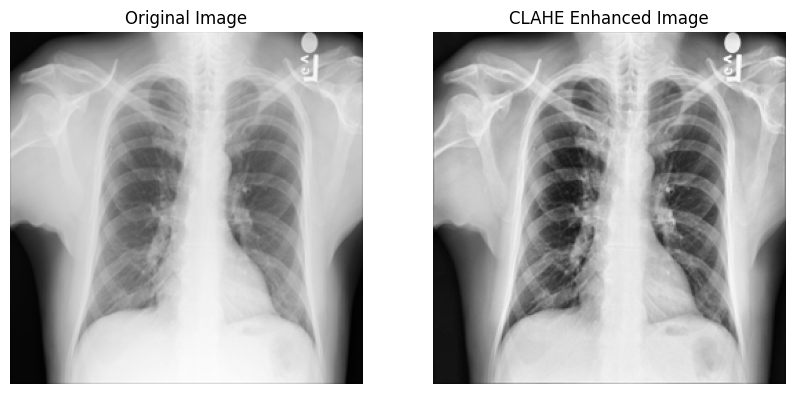

In [13]:
# Visual test of the future preprocessing:
# Evaluation of the CLAHE performance

sett = random.choice(sets)
group = random.choice(groups)

directory_path = os.path.join(destination_path, sett, group, 'images')

files = os.listdir(directory_path)
random_file = random.choice(files)

image_path = os.path.join(directory_path, random_file)

image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# Apply CLAHE
clahe_image = clahe.apply(gray_image)
# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Display the original image in the first subplot
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the CLAHE-enhanced image in the second subplot
axes[1].imshow(cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB))
axes[1].set_title('CLAHE Enhanced Image')
axes[1].axis('off')
plt.show()

# 2- Data preparation

In [14]:
# Implementation of the CLAHE preprocessing:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_image(img):
    # Check if image is RGB and convert to grayscale
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Ensure image is of type uint8 for CLAHE
    img = img.astype('uint8')
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    
    # Convert grayscale back to RGB
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Normalize the image to [0, 1]
    img = img.astype('float32') / 255.0
    
    return img

# Data generators with the custom preprocessing function
train_data_generator = ImageDataGenerator(preprocessing_function=preprocess_image)
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_image)
test_data_generator = ImageDataGenerator(preprocessing_function=preprocess_image)

In [15]:
# Preparation of the data set using image generator
batch_size = 32
train_generator = train_data_generator.flow_from_directory(directory=os.path.join(destination_path, 'Train'),
                                                           class_mode="sparse",
                                                           target_size=(224, 224),
                                                           batch_size=batch_size)

val_generator = val_data_generator.flow_from_directory(directory=os.path.join(destination_path, 'Val'),
                                                         class_mode="sparse",
                                                         target_size=(224, 224),
                                                         batch_size=batch_size)

test_generator = test_data_generator.flow_from_directory(directory=os.path.join(destination_path, 'Test'),
                                                          class_mode="sparse",
                                                          target_size=(224, 224),
                                                          batch_size=batch_size, shuffle=False)
# shuffle=False argument is very important for model evaluation

Found 21715 images belonging to 3 classes.
Found 5417 images belonging to 3 classes.
Found 6788 images belonging to 3 classes.


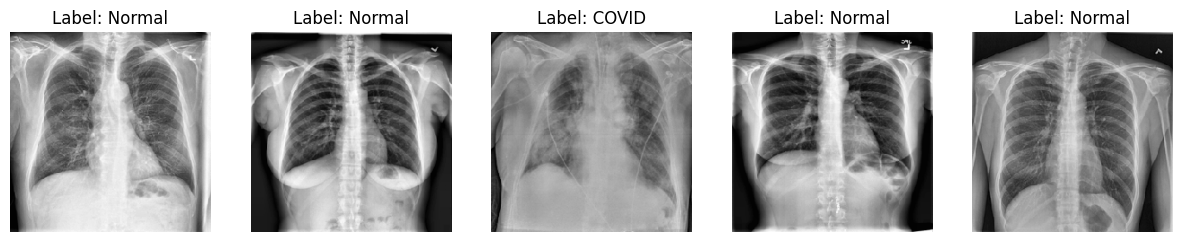

In [16]:
# Visual check of images in generators:

class_names = {
    0: 'COVID',
    1: 'Non COVID',
    2: 'Normal'
}
# Function to visualize images from a batch
def visualize_images(image_batch, label_batch, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(image_batch[i])
        plt.title(f"Label: {class_names[label_batch[i]]}")
        plt.axis('off')
    plt.show()

# Retrieve a batch of images and labels from the generator
train_generator.reset()
batch_images, batch_labels = train_generator[1]

# Visualize the batch of images
visualize_images(batch_images, batch_labels)

# 3- DenseNet Model
The architecture of our model is based on a DenseNet201.

In [17]:
#Main architecture of the model
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_model():
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False
    for layer in base_model.layers[137:]:
        layer.trainable = True

    # Add custom classifier layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [18]:
# Model
Model_DNet = build_model()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [19]:
# Checking of model layers
Model_DNet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,847,043 (71.90 MB)

 Trainable params: 17,320,451 (66.07 MB)

 Non-trainable params: 1,526,592 (5.82 MB)

In [20]:
# Definition of callbacks:
from tensorflow.keras.callbacks import ReduceLROnPlateau


reduce_learning_rate = ReduceLROnPlateau(
                                    monitor="val_loss",
                                    patience=3, #si val_loss stagne sur 3 epochs consécutives selon la valeur min_delta
                                    min_delta= 0.01,
                                    factor=0.1,  # On réduit le learning rate d'un facteur 0.1
                                    cooldown = 4, # On attend 4 epochs avant de réitérer 
                                    verbose=1)

In [21]:
# MODEL TRAINING:
nb_img_train = train_generator.samples
nb_img_val = val_generator.samples
history_densenet = Model_DNet.fit(train_generator, 
                                epochs = 30,
                                steps_per_epoch = nb_img_train//batch_size,
                                validation_data=val_generator,
                                validation_steps=nb_img_val//batch_size,
                                callbacks = [reduce_learning_rate]
                                )

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715323079.368069     142 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715323079.634701     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


112/678 ━━━━━━━━━━━━━━━━━━━━ 17:38 2s/step - accuracy: 0.7119 - loss: 0.6896  

W0000 00:00:1715323287.292909     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.8196 - loss: 0.4580

W0000 00:00:1715323498.079841     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 708s 647ms/step - accuracy: 0.8197 - loss: 0.4579 - val_accuracy: 0.8447 - val_loss: 0.4557 - learning_rate: 0.0010
Epoch 2/30
  1/678 ━━━━━━━━━━━━━━━━━━━━ 3:38 323ms/step - accuracy: 0.8438 - loss: 0.3895

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


678/678 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.8438 - loss: 0.3895 - val_accuracy: 0.5556 - val_loss: 1.3642 - learning_rate: 0.0010
Epoch 3/30


W0000 00:00:1715323543.303681     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 252s 370ms/step - accuracy: 0.9040 - loss: 0.2521 - val_accuracy: 0.8891 - val_loss: 0.2823 - learning_rate: 0.0010
Epoch 4/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 146us/step - accuracy: 0.9062 - loss: 0.2464 - val_accuracy: 1.0000 - val_loss: 0.0744 - learning_rate: 0.0010
Epoch 5/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 251s 370ms/step - accuracy: 0.9234 - loss: 0.2126 - val_accuracy: 0.9007 - val_loss: 0.2903 - learning_rate: 0.0010
Epoch 6/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 132us/step - accuracy: 0.9375 - loss: 0.2096 - val_accuracy: 0.8889 - val_loss: 0.1197 - learning_rate: 0.0010
Epoch 7/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9307 - loss: 0.1892
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
678/678 ━━━━━━━━━━━━━━━━━━━━ 252s 370ms/step - accuracy: 0.9307 - loss: 0.1892 - val_accuracy: 0.8650 - val_loss: 0.3967 - learning_rate: 0.0010
Epoch 8/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 139us/step - accuracy: 0.8750 - loss: 

In [22]:
# Loss and accuracy analysis during training
def plot_model_history (history):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss by epoch')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='right')

    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model acc by epoch')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='right')
    plt.show()

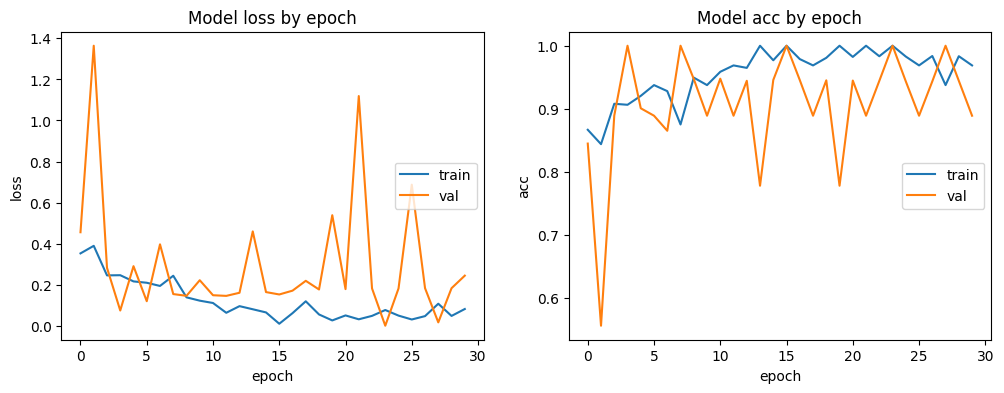

In [23]:
plot_model_history(history_densenet)

## 5- RESULTS

In [24]:
# Model evaluation on test generator data
evaluation = Model_DNet.evaluate(test_generator)

# Print the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

213/213 ━━━━━━━━━━━━━━━━━━━━ 48s 223ms/step - accuracy: 0.9740 - loss: 0.0915
Test Loss: 0.14662835001945496
Test Accuracy: 0.9572775363922119


W0000 00:00:1715327116.144723     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  2/213 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step  

W0000 00:00:1715327133.935099     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


213/213 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step


W0000 00:00:1715327174.897508     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2395
           1       0.93      0.96      0.94      2253
           2       0.95      0.93      0.94      2140

    accuracy                           0.96      6788
   macro avg       0.96      0.96      0.96      6788
weighted avg       0.96      0.96      0.96      6788



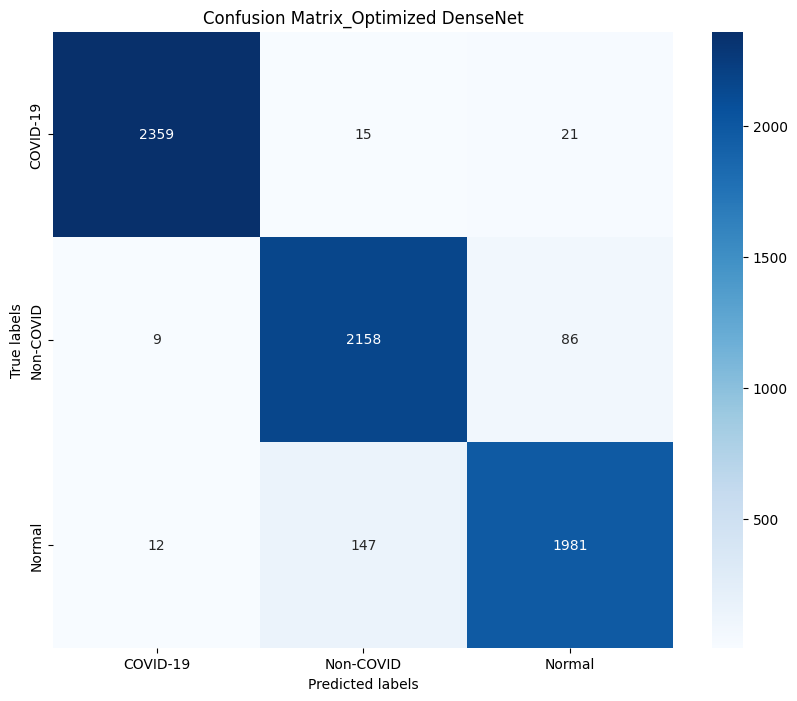

In [25]:
# Confusion_ matrix:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test data
predictions = Model_DNet.predict(test_generator)
# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
# Get the true classes
true_classes = test_generator.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes))
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix_Optimized DenseNet')
plt.show()

In [26]:
# Visualization of results on images from test_generator data:
class_names = {
    0: 'COVID',
    1: 'Non COVID',
    2: 'Normal'
}

# Function to apply the model on a batch of images and visualize the results
def apply_model_and_visualize_multiple_images(model, data_generator, num_images=12):
    plt.figure(figsize=(15, 15))
    data_generator.reset()
    
    for i in range(num_images):
        # Retrieve one image and its label from the generatorl 
        batch_images, batch_labels = random.choice(data_generator)
        image = batch_images[0]  # Take the first image from the batch
        label = round(batch_labels[0])  # Corresponding label
        
        # Reshape the image to (1, height, width, channels) for model prediction
        image = np.expand_dims(image, axis=0)
        
        # Apply the trained model to obtain prediction
        prediction = model.predict(image)
        
        # Round the predicted label to the nearest integer
        predicted_label = np.argmax(prediction)
        
        # Convert integer labels to class names
        true_class_name = class_names[label]
        predicted_class_name = class_names[predicted_label]
        
        # Visualize the result
        plt.subplot(4, 3, i+1)
        plt.imshow(image[0])
        
        # Determine title color based on whether true and predicted labels match
        title_color = 'green' if true_class_name == predicted_class_name else 'red'
        
        plt.title(f"True Label: {true_class_name}\nPredicted Label: {predicted_class_name}", color=title_color)
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


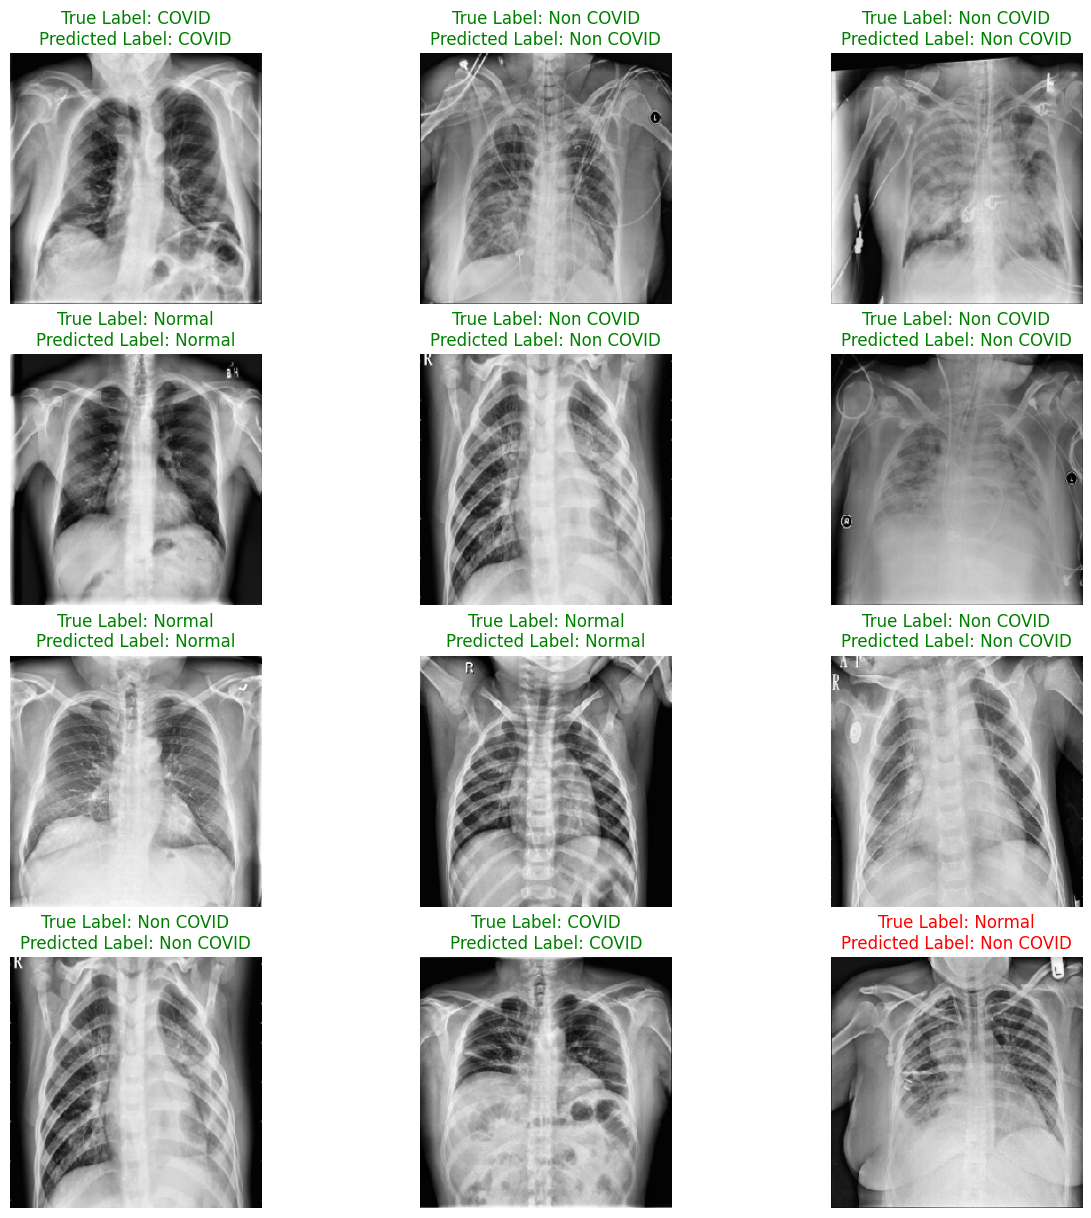

In [ ]:
# Example usage for applying the model on multiple images from the validation set
apply_model_and_visualize_multiple_images(Model_DNet, test_generator, num_images=12)

# 6- GRAD-Cam analyses
As we need to understand how the model is classifiyng images, a grad-cam analyzes is performed.

In [ ]:
def compute_gradcam(image, class_index, model, layer_name):
    with tf.GradientTape() as tape:
        conv_output, predictions = model(image)
        loss = predictions[:, class_index]

    # Get the gradients of the predicted class with respect to the output feature map of the selected layer
    grads = tape.gradient(loss, conv_output)[0]

    # Pool the gradients across the channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Get the activations of the selected layer
    conv_output_value = conv_output[0]

    # Weight the activations by the gradients
    heatmap = tf.reduce_mean(conv_output_value * tf.expand_dims(tf.expand_dims(pooled_grads, axis=0), axis=0), axis=-1)

    # ReLU operation
    heatmap = tf.nn.relu(heatmap)

    # Normalize the heatmap
    heatmap /= tf.reduce_max(heatmap)

    return heatmap

In [ ]:
model = Model_DNet
layer_name = 'conv5_block32_concat'
grad_model = tf.keras.models.Model(model.inputs, [model.get_layer(layer_name).output, model.output])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


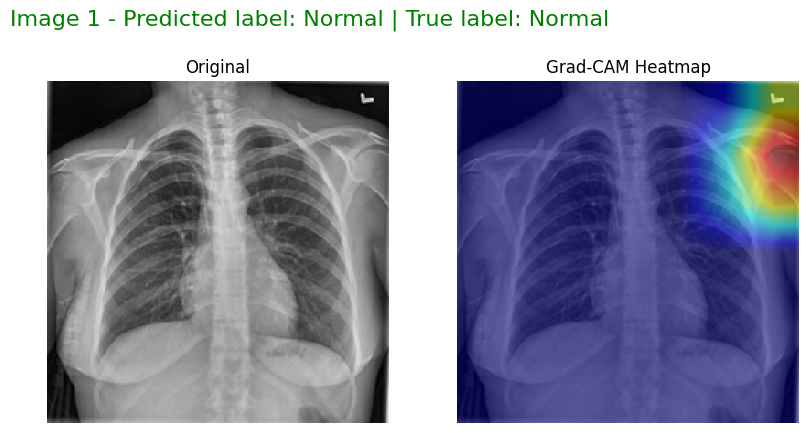

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


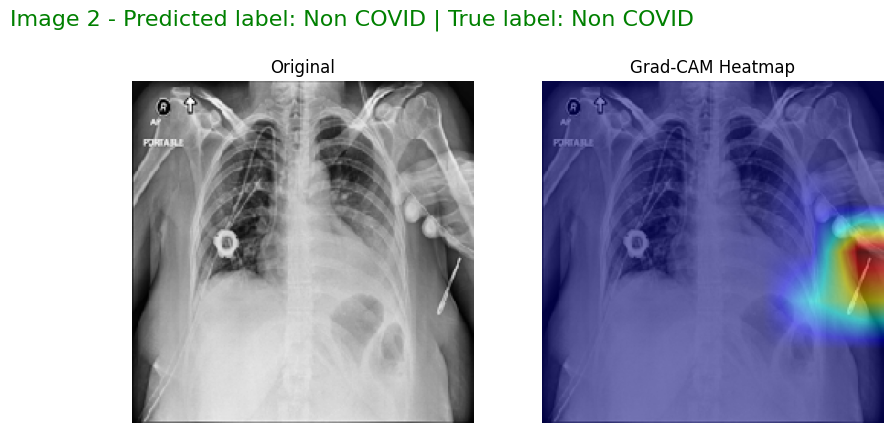

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


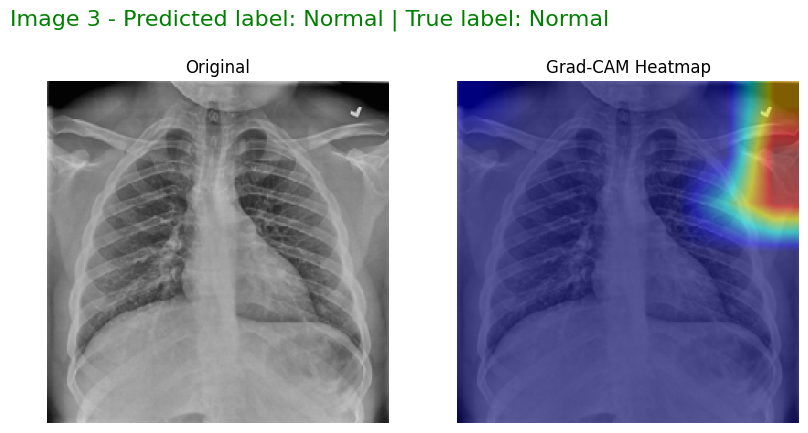

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


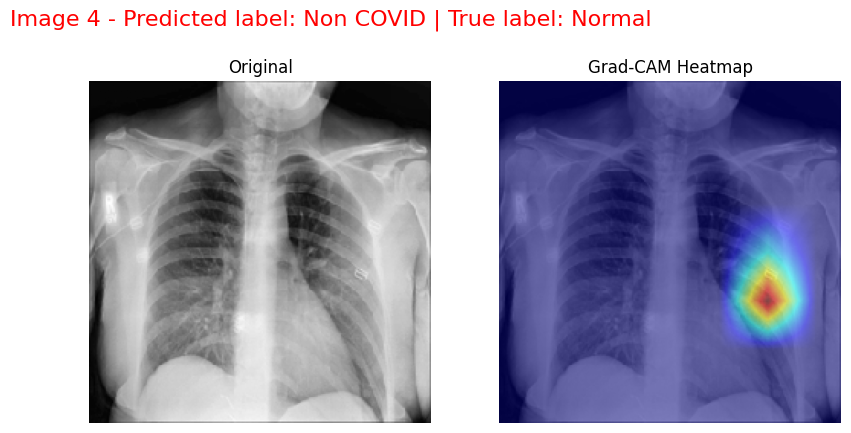

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


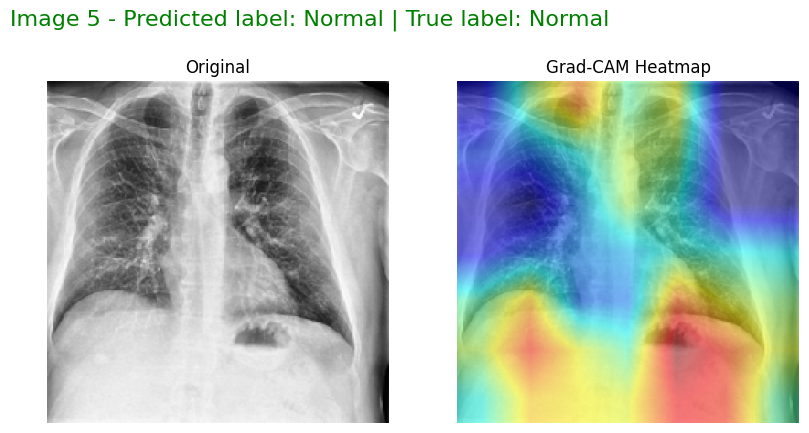

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


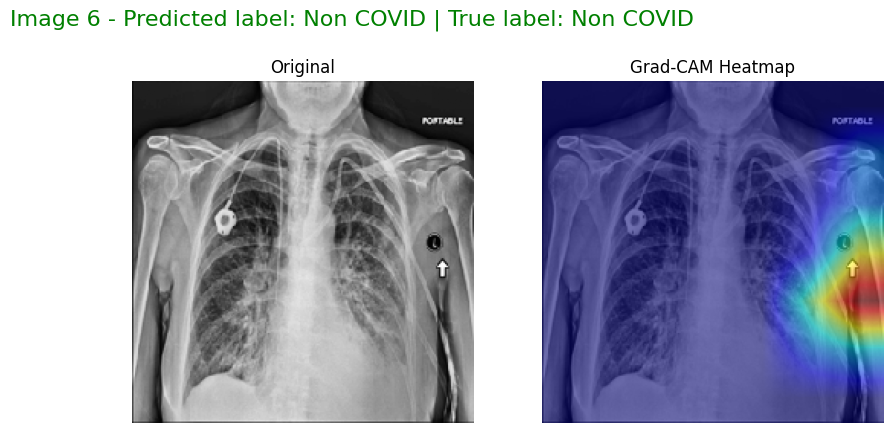

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


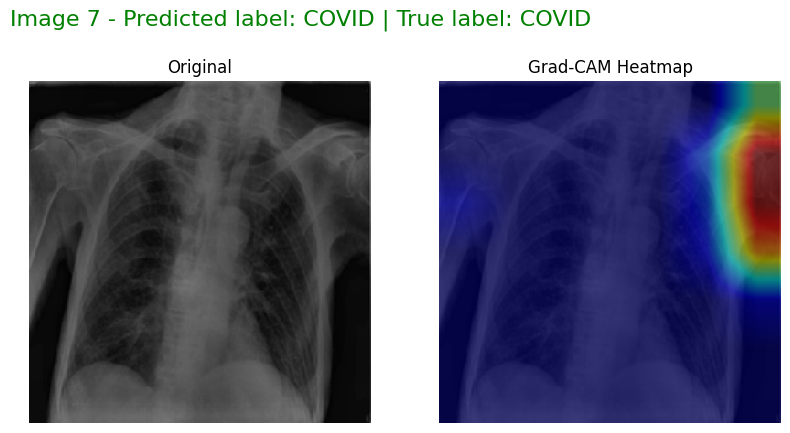

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


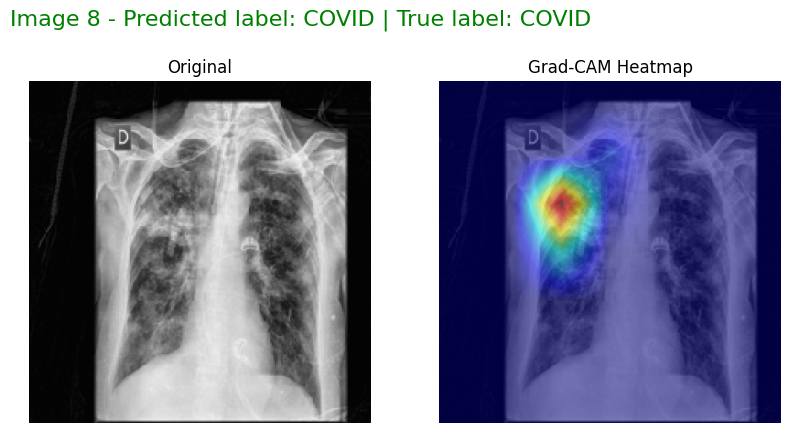

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


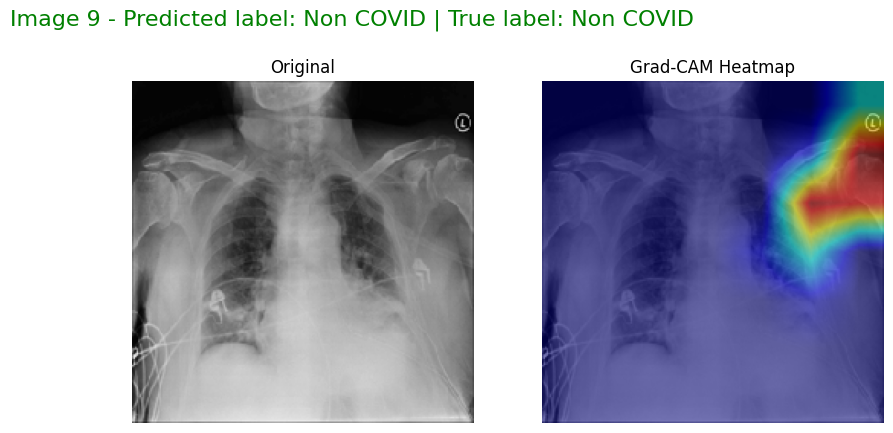

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


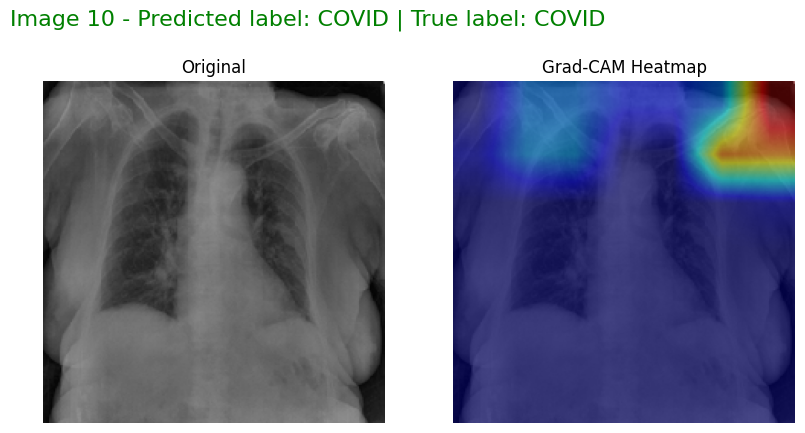

In [ ]:
num_images_to_process = 10

# Iterate through the images
for i in range(num_images_to_process):
    batch_images, batch_labels = random.choice(test_generator)
    batch_image = batch_images[:num_images_to_process]  # Take the first image from the batch
    batch_label = batch_labels[:num_images_to_process]  # Corresponding label
    img_array = batch_image[i]
    image = np.expand_dims(img_array, axis=0)

    # Make predictions
    preds = model.predict(image)
    predicted_class = np.argmax(preds[0])
    heatmap = compute_gradcam(image, predicted_class, grad_model, layer_name)

    # Resize the heatmap to the original image size
    heatmap = tf.expand_dims(heatmap, axis=-1)  # Add an extra channel dimension
    heatmap = tf.image.resize(heatmap, (img_array.shape[0], img_array.shape[1]))

    # Convert the heatmap to numpy array
    heatmap = heatmap.numpy()

    # Normalize the heatmap
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    heatmap = np.uint8(255 * heatmap)

    # Apply colormap (jet or any other)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Convert heatmap to float32 and scale to [0, 1]
    heatmap = heatmap.astype(np.float32) / 255

    # Combine the heatmap with the original image
    superimposed_img = cv2.addWeighted(img_array.astype(np.float32), 0.5, heatmap, 0.5, 0)

    # Get the class label for the predicted class
    class_label = class_names[predicted_class] 
    real_label = round(batch_label[i])
    true_class_name = class_names[real_label]
    
    title_color = 'green' if true_class_name == class_label else 'red'

    # Plot the original image, the Grad-CAM heatmap, and the heatmap
    plt.figure(figsize=(15, 5))
    plt.suptitle('Image {} - Predicted label: {} | True label: {}'.format(i+1, class_label, true_class_name), fontsize=16, x=0.5, y=0.98, horizontalalignment='right', color=title_color)
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with Matplotlib
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')

    plt.show()

# 7- Analysis with MASKED IMAGES

In [ ]:
for sett in sets:
  for group in groups:
    
    image_folder = os.path.join(base_path, sett, group, 'images')
    masks_folder = os.path.join(base_path, sett, group, 'lung masks')
    output_dir = os.path.join(destination_path_masked, sett, group, 'masked images')
   
    os.makedirs(output_dir, exist_ok=True)

    images = sorted(os.listdir(image_folder))

    for image_name in tqdm(images):
        img_path = os.path.join(image_folder, image_name)
        mask_path = os.path.join(masks_folder, image_name)  # Assuming mask names are the same as image names

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        masked_image = cv2.bitwise_and(img, img, mask=mask)

        output_path = os.path.join(output_dir, f'masked_{image_name[:-4]}.png')  # Save as PNG
        
        cv2.imwrite(output_path, masked_image)

    print(f"{sett} {group} masked images saved successfully.")

100%|██████████| 1903/1903 [00:25<00:00, 75.82it/s]


Val COVID-19 masked images saved successfully.


100%|██████████| 1712/1712 [00:23<00:00, 72.91it/s]


Val Normal masked images saved successfully.


100%|██████████| 1802/1802 [00:24<00:00, 74.20it/s]


Val Non-COVID masked images saved successfully.


100%|██████████| 2395/2395 [00:34<00:00, 69.09it/s]


Test COVID-19 masked images saved successfully.


100%|██████████| 2140/2140 [00:27<00:00, 76.65it/s]


Test Normal masked images saved successfully.


100%|██████████| 2253/2253 [00:29<00:00, 76.58it/s]


Test Non-COVID masked images saved successfully.


100%|██████████| 7658/7658 [01:52<00:00, 68.09it/s]


Train COVID-19 masked images saved successfully.


100%|██████████| 6849/6849 [01:29<00:00, 76.37it/s]


Train Normal masked images saved successfully.


100%|██████████| 7208/7208 [01:35<00:00, 75.57it/s]

Train Non-COVID masked images saved successfully.


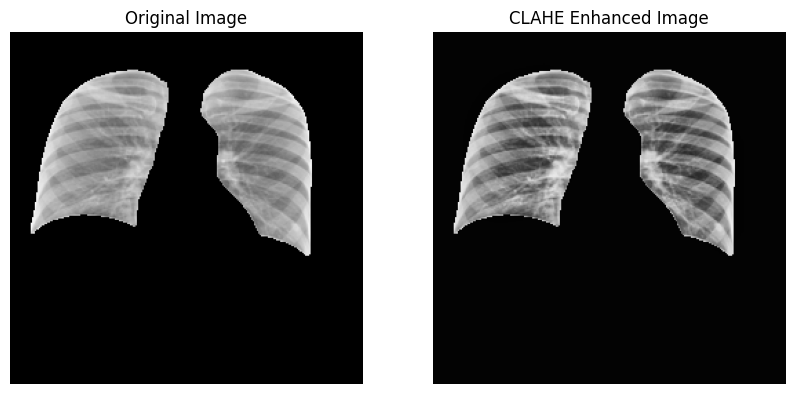

In [ ]:
# Visual test of the future preprocessing:
# Evaluation of the CLAHE performance

sett = random.choice(sets)
group = random.choice(groups)

directory_path = os.path.join(destination_path_masked, sett, group, 'masked images')

files = os.listdir(directory_path)
random_file = random.choice(files)

image_path = os.path.join(directory_path, random_file)

image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# Apply CLAHE
clahe_image = clahe.apply(gray_image)
# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Display the original image in the first subplot
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the CLAHE-enhanced image in the second subplot
axes[1].imshow(cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB))
axes[1].set_title('CLAHE Enhanced Image')
axes[1].axis('off')
plt.show()

In [ ]:
# Preparation of the data set using image generator
batch_size = 32
train_generator_m = train_data_generator.flow_from_directory(directory=os.path.join(destination_path_masked, 'Train'),
                                                           class_mode="sparse",
                                                           target_size=(224, 224),
                                                           batch_size=batch_size)

val_generator_m = val_data_generator.flow_from_directory(directory=os.path.join(destination_path_masked, 'Val'),
                                                         class_mode="sparse",
                                                         target_size=(224, 224),
                                                         batch_size=batch_size)

test_generator_m = test_data_generator.flow_from_directory(directory=os.path.join(destination_path_masked, 'Test'),
                                                          class_mode="sparse",
                                                          target_size=(224, 224),
                                                          batch_size=batch_size, shuffle=False)
# shuffle=False argument is very important for model evaluation

Found 21715 images belonging to 3 classes.
Found 5417 images belonging to 3 classes.
Found 6788 images belonging to 3 classes.


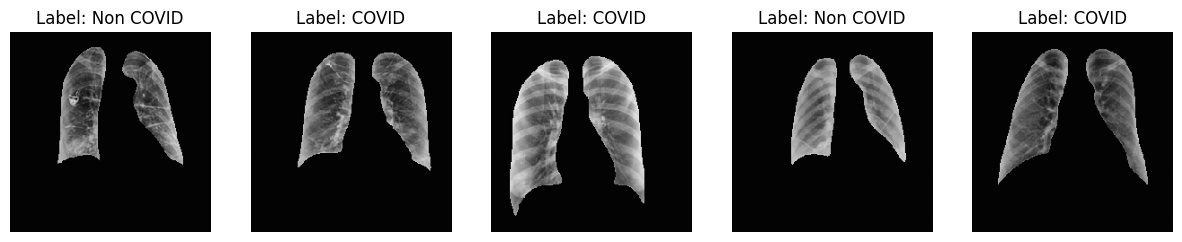

In [ ]:
# Visual check of images in generators:

# Retrieve a batch of images and labels from the generator
train_generator_m.reset()
batch_images, batch_labels = train_generator_m[1]

# Visualize the batch of images
visualize_images(batch_images, batch_labels)

In [ ]:
Model_DNet_m = build_model()

In [ ]:
nb_img_train = train_generator_m.samples
nb_img_val = val_generator_m.samples
history_densenet_m = Model_DNet_m.fit(train_generator_m, 
                                epochs = 30,
                                steps_per_epoch = nb_img_train//batch_size,
                                validation_data=val_generator_m,
                                validation_steps=nb_img_val//batch_size,
                                callbacks = [reduce_learning_rate]
                                )

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
W0000 00:00:1715327878.858828     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


408/678 ━━━━━━━━━━━━━━━━━━━━ 2:38 586ms/step - accuracy: 0.7120 - loss: 0.6917

W0000 00:00:1715328117.641567     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.7337 - loss: 0.6495

W0000 00:00:1715328224.614637     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 553s 540ms/step - accuracy: 0.7338 - loss: 0.6494 - val_accuracy: 0.7931 - val_loss: 0.6820 - learning_rate: 0.0010
Epoch 2/30
  1/678 ━━━━━━━━━━━━━━━━━━━━ 3:39 324ms/step - accuracy: 0.7812 - loss: 0.4507

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


678/678 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7812 - loss: 0.4507 - val_accuracy: 0.8889 - val_loss: 0.2262 - learning_rate: 0.0010
Epoch 3/30


W0000 00:00:1715328253.914353     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


678/678 ━━━━━━━━━━━━━━━━━━━━ 250s 367ms/step - accuracy: 0.8233 - loss: 0.4588 - val_accuracy: 0.7254 - val_loss: 1.0079 - learning_rate: 0.0010
Epoch 4/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step - accuracy: 0.8438 - loss: 0.3817 - val_accuracy: 0.7778 - val_loss: 0.5020 - learning_rate: 0.0010
Epoch 5/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.8450 - loss: 0.4010
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
678/678 ━━━━━━━━━━━━━━━━━━━━ 249s 366ms/step - accuracy: 0.8450 - loss: 0.4010 - val_accuracy: 0.8206 - val_loss: 0.4458 - learning_rate: 0.0010
Epoch 6/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.8438 - loss: 0.3081 - val_accuracy: 0.8889 - val_loss: 0.2425 - learning_rate: 1.0000e-04
Epoch 7/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 249s 366ms/step - accuracy: 0.8865 - loss: 0.3011 - val_accuracy: 0.8707 - val_loss: 0.3238 - learning_rate: 1.0000e-04
Epoch 8/30
678/678 ━━━━━━━━━━━━━━━━━━━━ 0s 122us/step - accuracy: 0.9375 

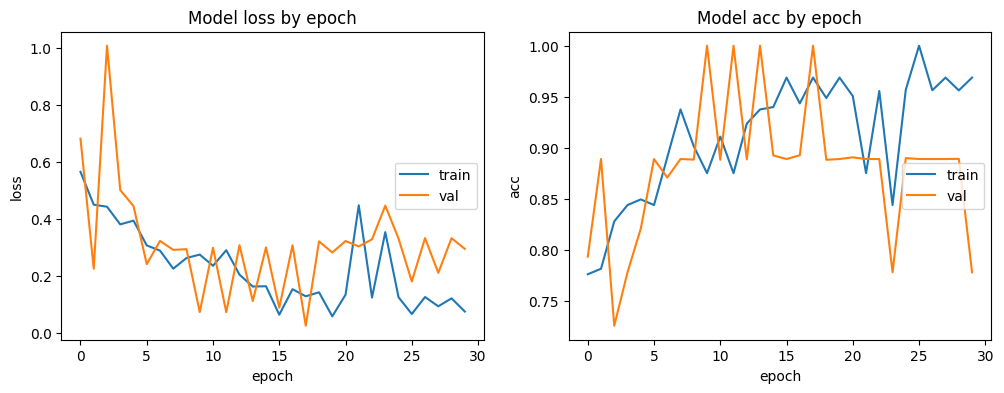

In [ ]:
# Loss and accuracy analysis during training

plot_model_history(history_densenet_m)

In [ ]:
# Model evaluation on test generator data
evaluation = Model_DNet_m.evaluate(test_generator_m)

# Print the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

213/213 ━━━━━━━━━━━━━━━━━━━━ 34s 161ms/step - accuracy: 0.9084 - loss: 0.3029
Test Loss: 0.3025888502597809
Test Accuracy: 0.9076310992240906


W0000 00:00:1715331793.188017     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  2/213 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step

W0000 00:00:1715331808.253857     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


213/213 ━━━━━━━━━━━━━━━━━━━━ 54s 183ms/step


W0000 00:00:1715331847.110439     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2395
           1       0.91      0.91      0.91      2253
           2       0.88      0.92      0.90      2140

    accuracy                           0.91      6788
   macro avg       0.91      0.91      0.91      6788
weighted avg       0.91      0.91      0.91      6788



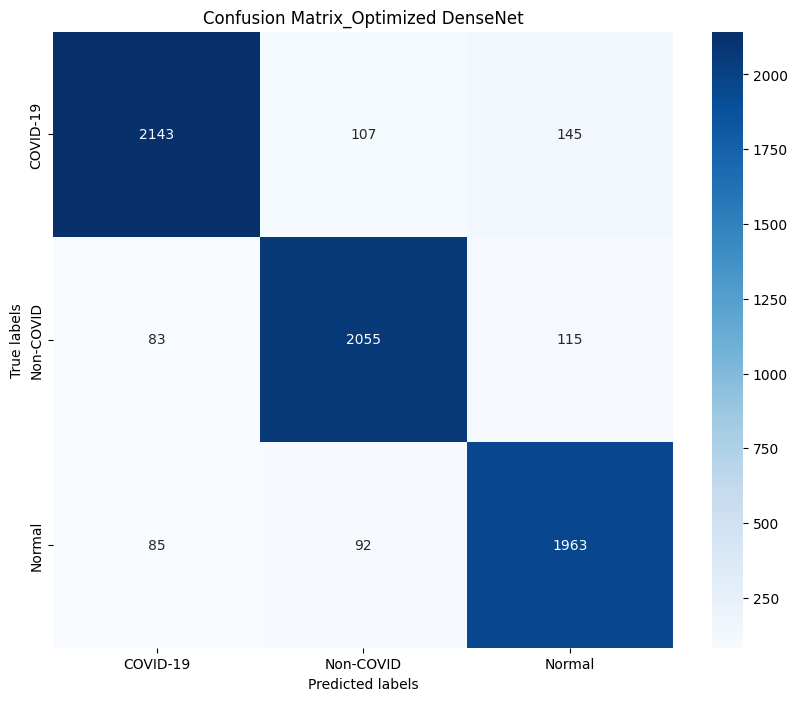

In [ ]:
# Confusion_ matrix:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test data
predictions = Model_DNet_m.predict(test_generator_m)
# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
# Get the true classes
true_classes = test_generator_m.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes))
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator_m.class_indices.keys(), yticklabels=test_generator_m.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix_Optimized DenseNet')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


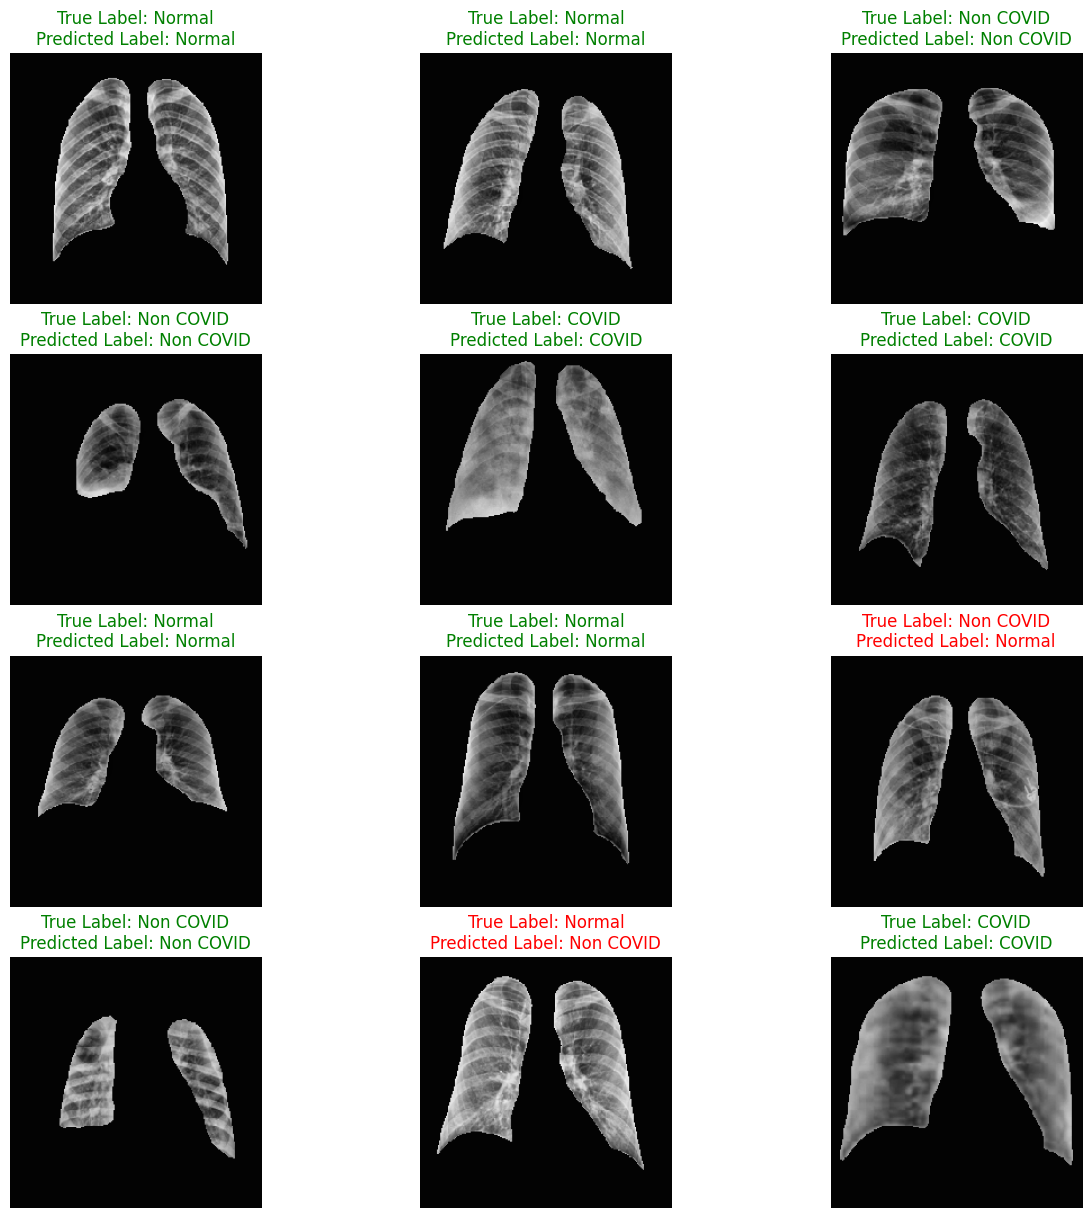

In [ ]:
apply_model_and_visualize_multiple_images(Model_DNet_m, test_generator_m, num_images=12)

In [ ]:
model = Model_DNet_m
layer_name = 'conv5_block32_concat'
grad_model = tf.keras.models.Model(model.inputs, [model.get_layer(layer_name).output, model.output])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


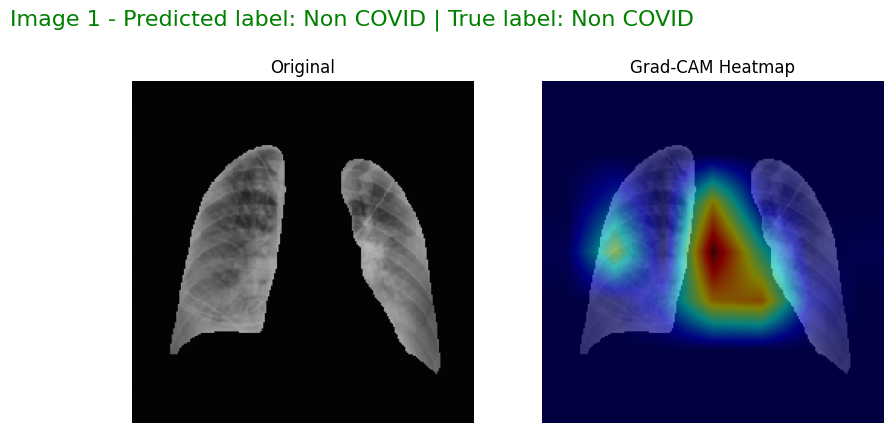

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


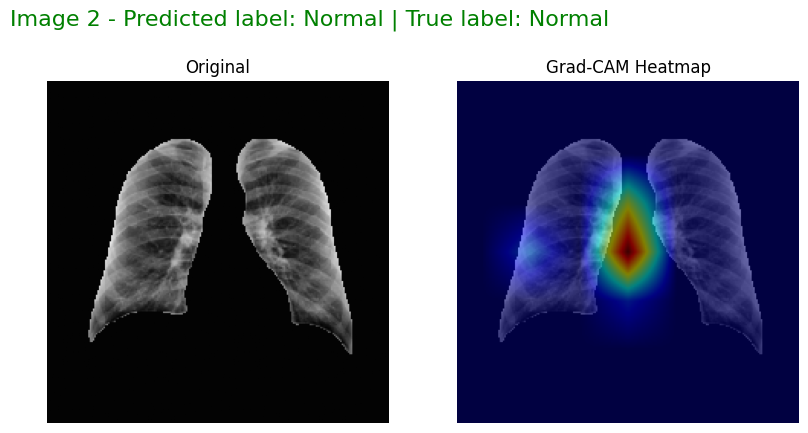

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


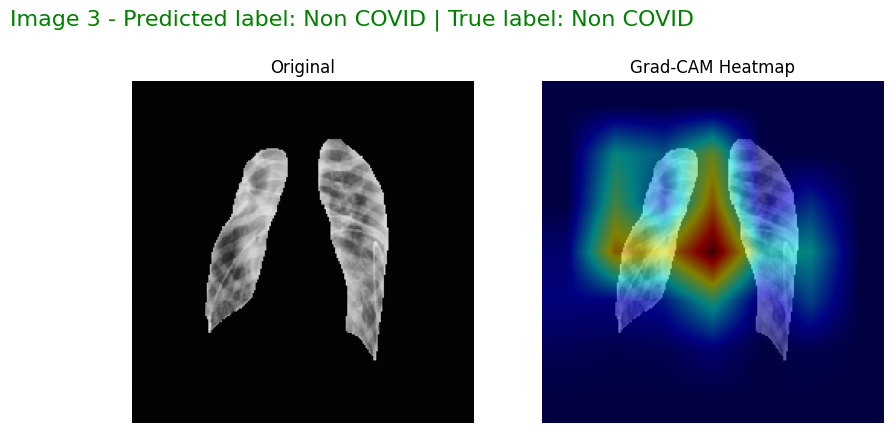

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


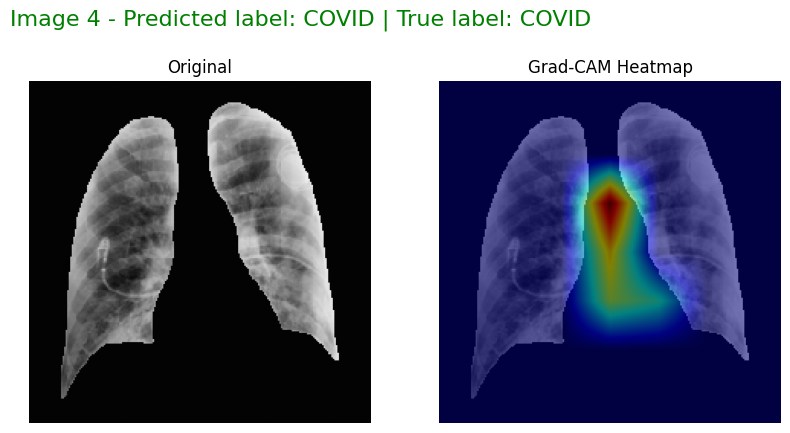

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


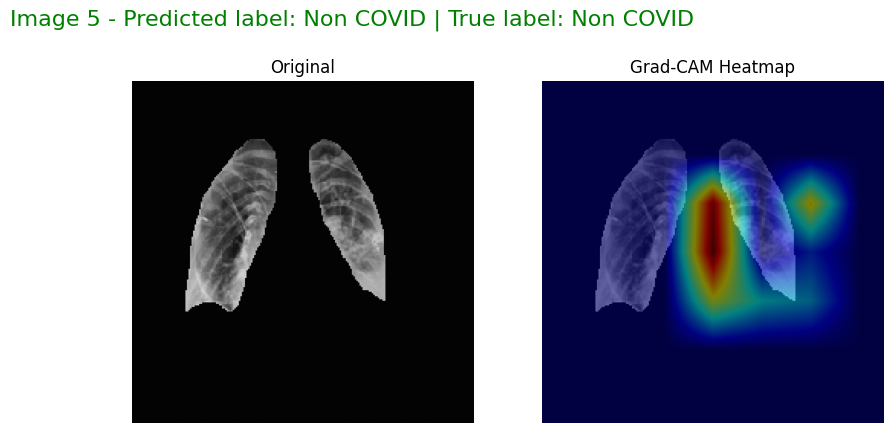

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


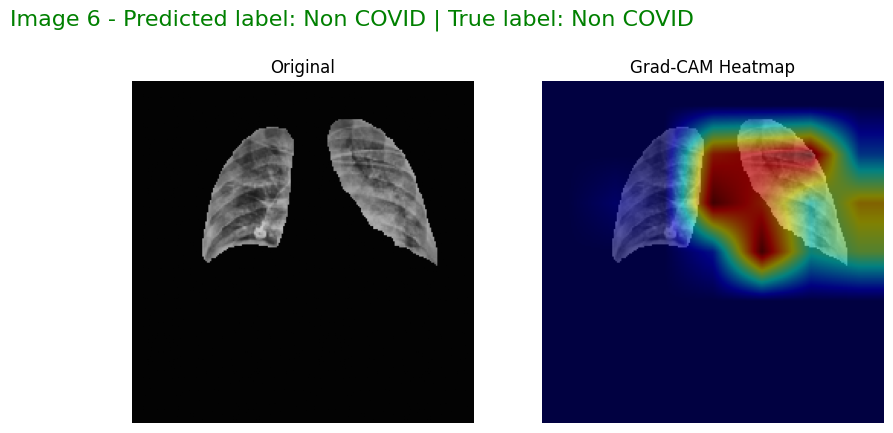

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


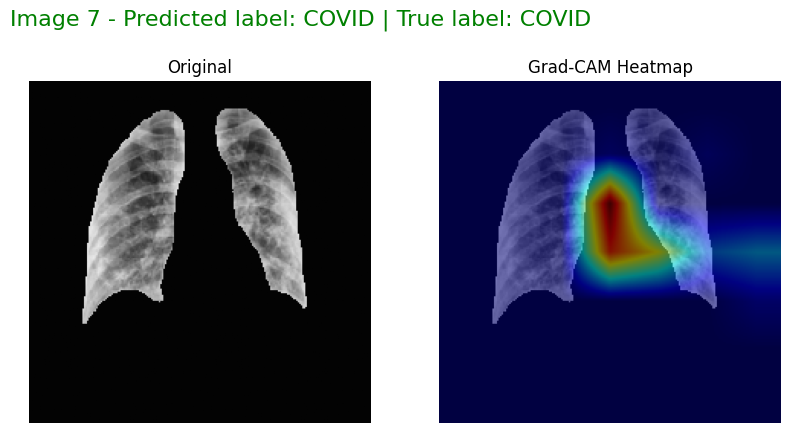

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


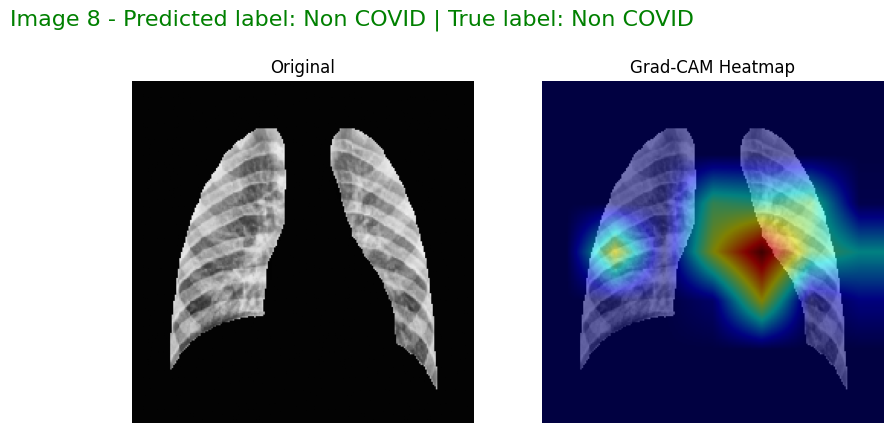

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


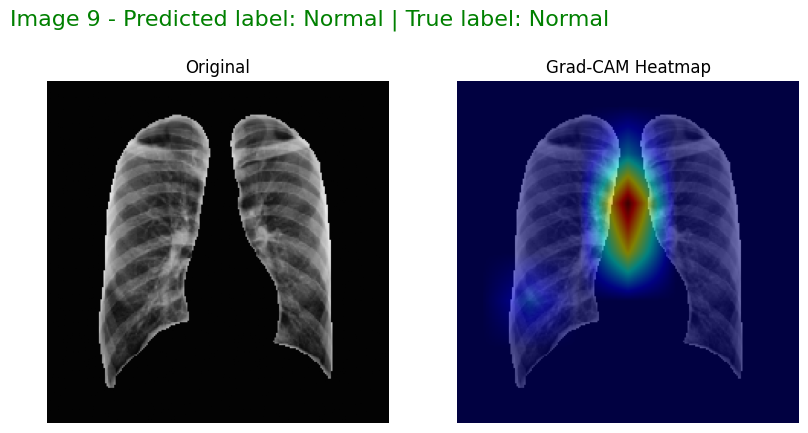

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


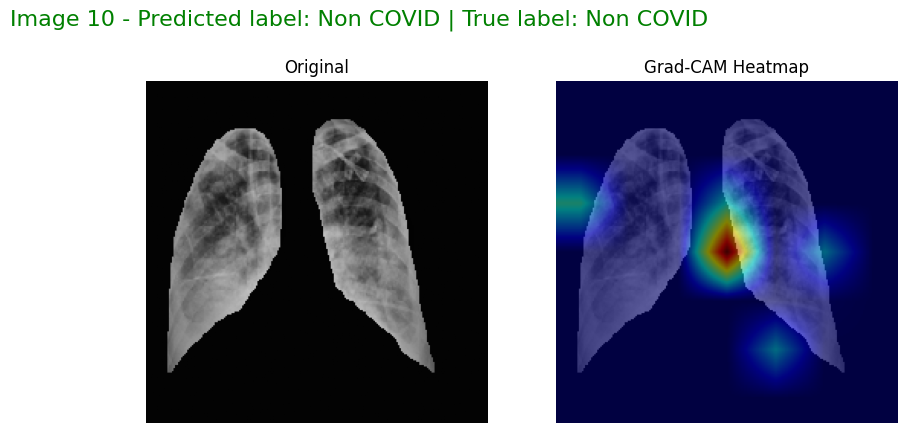

In [46]:
num_images_to_process = 10

# Iterate through the images
for i in range(num_images_to_process):
    batch_images, batch_labels = random.choice(test_generator_m)
    batch_image = batch_images[:num_images_to_process]  # Take the first image from the batch
    batch_label = batch_labels[:num_images_to_process]  # Corresponding label
    img_array = batch_image[i]
    image = np.expand_dims(img_array, axis=0)

    # Make predictions
    preds = model.predict(image)
    predicted_class = np.argmax(preds[0])
    heatmap = compute_gradcam(image, predicted_class, grad_model, layer_name)

    # Resize the heatmap to the original image size
    heatmap = tf.expand_dims(heatmap, axis=-1)  # Add an extra channel dimension
    heatmap = tf.image.resize(heatmap, (img_array.shape[0], img_array.shape[1]))

    # Convert the heatmap to numpy array
    heatmap = heatmap.numpy()

    # Normalize the heatmap
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    heatmap = np.uint8(255 * heatmap)

    # Apply colormap (jet or any other)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Convert heatmap to float32 and scale to [0, 1]
    heatmap = heatmap.astype(np.float32) / 255

    # Combine the heatmap with the original image
    superimposed_img = cv2.addWeighted(img_array.astype(np.float32), 0.5, heatmap, 0.5, 0)

    # Get the class label for the predicted class
    class_label = class_names[predicted_class] 
    real_label = round(batch_label[i])
    true_class_name = class_names[real_label]
    
    title_color = 'green' if true_class_name == class_label else 'red'

    # Plot the original image, the Grad-CAM heatmap, and the heatmap
    plt.figure(figsize=(15, 5))
    plt.suptitle('Image {} - Predicted label: {} | True label: {}'.format(i+1, class_label, true_class_name), fontsize=16, x=0.5, y=0.98, horizontalalignment='right', color=title_color)
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with Matplotlib
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')

    plt.show()

# SAVINGS

In [45]:
#If session re-loaded or any future use of the model: 
#Model_DNet.load_weights('/kaggle/working/COVID-EX-Qu-dataset/Models/DNet_B_v0.weights.h5')

#Model saving
Model_DNet.save_weights('/kaggle/working/Models/DNet_B_v0_image.weights.h5')
Model_DNet_m.save_weights('/kaggle/working/Models/DNet_B_v0_masked.weights.h5')

In [44]:
Model_DNet.save('/kaggle/working/Models/Model_DNet.h5') 
Model_DNet_m.save('/kaggle/working/Models/Model_DNet_m.h5')